In [1]:
import math as math
import numpy as np
import scipy as scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import sys
import os

from qutip import *
from src_2_0 import *

In [2]:
### General parameters ###
g_0 = 0.01 # Light-matter coupling
theta = np.pi # Squeezing angle
N = 300

In [3]:
r = 0.5 # Squeezing parameter
delta_c = 0.1 # Detuning w_c-w_p
n_q = 100 # Photon saturation number
C = 1 # Cooperativity (equal to the pumping parameter p)
omega = 0.45 # Amplitude of the coherent driving with well defined phase
phi = np.linspace(0,2*np.pi,25) # Fixed phase

In [4]:
a = open('PHI_VAR_0.5_1.0_0.50.txt','r')

data_pn = a.readlines()

pn = np.zeros([np.size(phi),N],dtype=complex)
n_s = np.zeros(np.size(phi),dtype=complex)


for i in range(phi.size):
    data_pn[i] = data_pn[i].split()
    pn[i]=data_pn[i][1:N+1]
    n_s[i]=data_pn[i][-1]

a.close()

c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


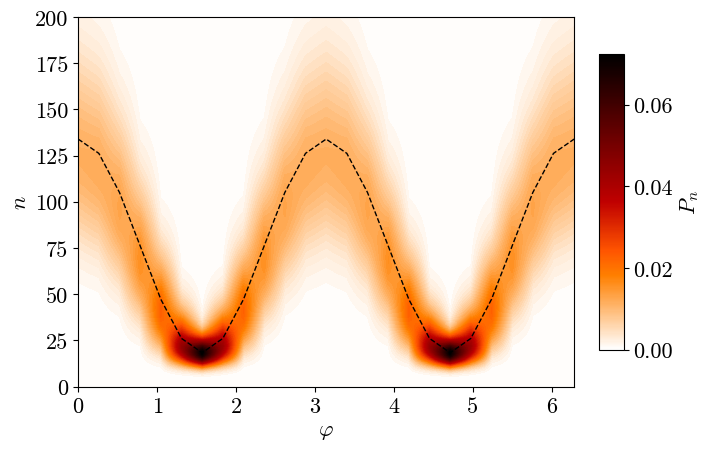

In [7]:
fig,ax = plt.subplots()

nrm = mpl.colors.Normalize(0,np.abs(np.array((pn)).max())) # Colorbar settings
cbar = fig.colorbar(cm.ScalarMappable(norm=nrm, cmap=cm.gist_heat_r),cax = ax.inset_axes([1.05, 0.1, 0.05, 0.8]))
cbar.set_label('$P_n$')

ax.contourf(phi,np.linspace(0,N-1,N),np.transpose(np.array((pn))), 100, cmap=cm.gist_heat_r, norm=nrm) # Plot of the distribution
ax.plot(phi,n_s*(np.cosh(2*r)-np.sinh(2*r)*np.cos(2*phi+theta))+np.sinh(r)**2,'--',lw=1,color='k')

plt.xlim([np.min(phi),np.max(phi)]) # Figure settings
plt.ylim([0,200])
# plt.title('Photon number distribution',fontsize=14)
plt.xlabel(r'$\varphi$')
plt.ylabel('$n$')
plt.show()
fig.savefig('phi_var.png',dpi=500, bbox_inches = 'tight')

In [447]:
r = 0.75 # Squeezing parameter
delta_c = 0.1 # Detuning w_c-w_p
n_q = 200 # Photon saturation number
C = 1 # Cooperativity (equal to the pumping parameter p)
omega2 = np.linspace(0,0.4,25) # Amplitude of the coherent driving with well defined phase
phi2 = theta/2  # Fixed phase
k = g_0*np.sqrt(2/(C*n_q)) # Photon decay rate

In [448]:
alpha = (np.e**(4*r)-1)/(np.e**(4*r)+1) # omega_p/delta_c
omega_p = alpha*delta_c # Amplitude of the coherent drive (down-conversion)
delta_s = delta_c*np.sqrt(1-(omega_p/delta_c)**2) # Detuning in the squeezed basis

In [449]:
n_d = (omega2)**2/(delta_s**2+(k/2)**2)

In [455]:
b = open('OMEGA_VAR_1.571_1.0_0.75.txt','r')

data_a2 = b.readlines()

a_2 = np.zeros(np.size(omega2),dtype=complex)
n_s = np.zeros(np.size(omega2),dtype=complex)


for i in range(omega2.size):
    data_a2[i] = data_a2[i].split()
    a_2[i]=data_a2[i][2]
    n_s[i]=data_a2[i][1]

b.close()

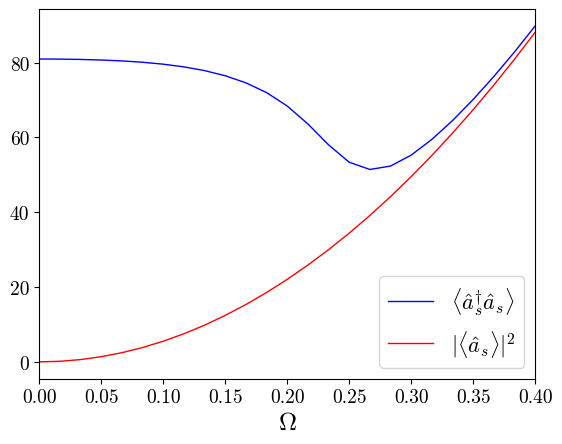

In [456]:
fig2,ax2 = plt.subplots()
ax2.plot(omega2,n_s,'-',lw=1,color='b',label=r'$\langle \hat{a}_s^{\dag}\hat{a}_s \rangle$')
ax2.plot(omega2,a_2,'-',lw=1,color='r',label=r'$|\langle \hat{a}_s \rangle|^2$')
plt.xlim([np.min(omega2),np.max(omega2)])
#plt.ylim([0,n_q])
# plt.title('Photon number')',fontsize=14)
plt.xlabel('$\Omega$')
plt.legend()
fig2.savefig('omega_var.png',dpi=500, bbox_inches = 'tight')

c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


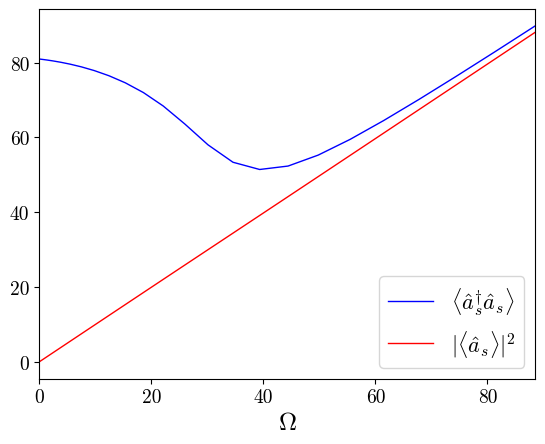

In [453]:
fig2,ax2 = plt.subplots()
ax2.plot(n_d,n_s,'-',lw=1,color='b',label=r'$\langle \hat{a}_s^{\dag}\hat{a}_s \rangle$')
ax2.plot(n_d,a_2,'-',lw=1,color='r',label=r'$|\langle \hat{a}_s \rangle|^2$')
plt.xlim([np.min(n_d),np.max(n_d)])
#plt.ylim([0,n_q])
# plt.title('Photon number')',fontsize=14)
plt.xlabel('$\Omega$')
plt.legend()